<a href="https://colab.research.google.com/github/mochammadcholilurrokhman/PCVK_Ganjil_Mochammad-Cholilur-Rokhman/blob/main/kelompokTugas3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Tugas Kelompok Minggu 5



## Kelompok 5:
- Brilyan Satria Wahyuda (05) - 2241720019
- Mochammad Cholilur Rokhman (15) - 2241720033
- Triyana Dewi Fatmawati (25) - 2241720206

###Kelompok 5 ambil bagian Agama dan Status Kawin.
**Perintah:** Gunakan image masking untuk mengambil bagian tertentu dari kartu identitas menggunakan fungsi yang telah Anda pelajari. Kemudian masing-masing simpan dalam nama image baru!


In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files

#### Preparing gambar

In [2]:
# Upload gambar
uploaded = files.upload()

# Fetch nama file yang diupload
image_dir = list(uploaded.keys())[0]

# Membaca gambar
image = cv.imread(image_dir)

# Mengubah gambar ke RGB
image_converted = cv.cvtColor(image,cv.COLOR_BGR2RGB)


Saving KTP.jpg to KTP.jpg


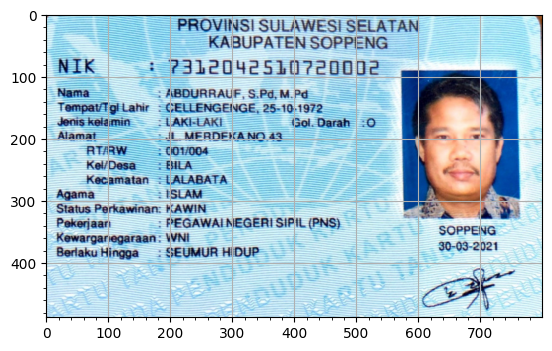

In [3]:
plt.imshow(image_converted)
plt.minorticks_on()
plt.grid(True)

#### Proses Masking Gambar

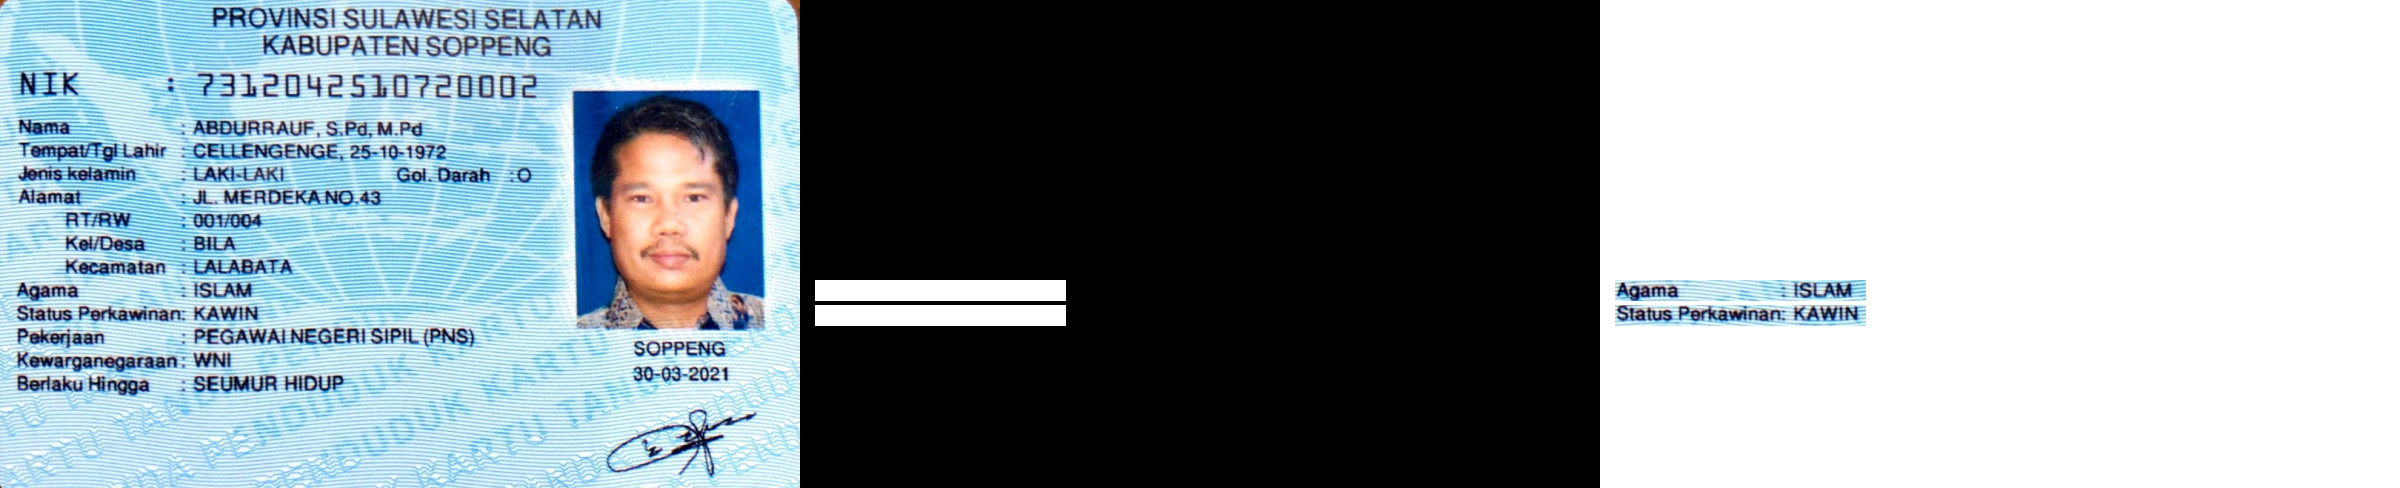

True

In [4]:
from google.colab.patches import cv2_imshow

# Buat mask kosong dengan ukuran yang sama seperti gambar KTP
mask = np.zeros(image.shape, np.uint8)

# Tentukan koordinat dan ukuran area untuk bagian Agama dan Status Kawin
# Misal: [x, y, width, height] - ganti sesuai dengan KTP
x_agama, y_agama, width_agama, height_agama = 15, 280, 250, 20  # Koordinat untuk Agama
x_kawin, y_kawin, width_kawin, height_kawin = 15, 305, 250, 20  # Koordinat untuk Status Kawin

# Buat mask untuk bagian Agama
cv.rectangle(mask, (x_agama, y_agama), (x_agama + width_agama, y_agama + height_agama), (255, 255, 255), thickness=cv.FILLED)

# Buat mask untuk bagian Status Kawin
cv.rectangle(mask, (x_kawin, y_kawin), (x_kawin + width_kawin, y_kawin + height_kawin), (255, 255, 255), thickness=cv.FILLED)

# Terapkan bitwise AND untuk menerapkan mask
masked = cv.bitwise_and(image, mask)

# Membuat background putih
whitebg = np.full(image.shape, 255, dtype=np.uint8)

# Kombinasikan hasil masking dengan background putih di area yang tidak dimask
res = np.where(mask != 0, masked, whitebg)

# Gabungkan gambar asli, mask, dan hasil akhir secara horizontal untuk visualisasi
final_frame = cv.hconcat([image, mask, res])

# Tampilkan hasil
cv2_imshow(final_frame)

# Simpan hasil gambar masking sebagai file baru
cv.imwrite('ktp_agama_status_kawin_masked.jpg', res)

### Hasil Analisa

1. Mengimpor library yang diperlukan untuk pemrosesan gambar (**cv2** dan **numpy**) dan fungsi khusus untuk menampilkan gambar di Google Colab (**cv2_imshow**).
2. Membuat mask kosong dengan ukuran yang sama seperti gambar input dibuat menggunakan **np.zeros**.
3. Menentukan koordinat dan ukuran area yang diinginkan untuk bagian Agama dan Status Kawin
4. Menggambar Persegi panjang putih pada mask pada koordinat yang ditentukan untuk menandai bagian yang akan di mask menggunakan **cv.rectangle**.
5. Menerapkan mask ke gambar KTP menggunakan operasi **cv.bitwise_and**, yang hanya menyimpan bagian gambar di mana mask berwarna putih.
6. Membuat gambar background putih dengan ukuran yang sama seperti gambar KTP menggunakan **np.full**.
7. Menggabungkan gambar yang telah dimask dengan background putih menggunakan **np.where**, di mana area yang tidak tertutupi oleh mask diganti dengan latar belakang putih.
8. Menggabungkan gambar asli, mask, dan hasil akhir secara horizontal untuk visualisasi menggunakan **cv.hconcat**.
9. Menampilkan gambar yang telah digabungkan menggunakan **cv2_imshow**.
10. Menyimpan gambar hasil masking sebagai file baru menggunakan **cv.imwrite**.





